In [1]:
from pyerr import ErrorrOutput
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# path to tape25 file for U235 ENDF-7.1
fle = "tape25"

create `ErrorrOutput` object without energy limits

In [3]:
output = ErrorrOutput(fle)

In this case, there are two MT's - 452 is total nubar, and 456 is prompt nubar. Some files also have MT 455, which is delayed nubar

In [4]:
output.sections

{452: <pyerr._section.Section at 0x7f46e09ba440>,
 456: <pyerr._section.Section at 0x7f4711f3e590>}

In [5]:
nubar = output.sections[452]

`nubar` is a Section object

In [6]:
nubar

the doc string lists the attributes and methods

In [7]:
help(nubar)

Help on Section in module pyerr._section object:

class Section(builtins.object)
 |  Section(energy_lines, mean_lines, covariance_lines, lower_limit=None, upper_limit=None)
 |  
 |  Class to hold a single section (MT value) from an ERRORR file, which includes
 |  the energy grid, the mean value, and the covariance matrix
 |  
 |  Parameters
 |  ----------
 |  energy_lines : list
 |      list of the lines from the file corresponding to the energy grid
 |  
 |  mean_lines : list
 |      list of the lines from the file corresponding to the mean values
 |  
 |  covariance_lines : list
 |      list of the lines from the file corresponding to the covariance
 |  
 |  lower_limit : float, optional, default is None
 |      the lower limit in energy (eV) to cut the values at. If not given, uses the lower 
 |      limit of the matrix in the file. If given, will cut out groups below the lower 
 |      limit. If the lower limit falls within a group, that group is kept
 |  
 |  
 |  upper_limit : fl

the MAT, MF, and MT values are on the section

In [8]:
nubar.MAT, nubar.MF, nubar.MT

(9228, 3, 452)

nubar is presented point-wise, as a function of incident energy, in the ENDF evaluations. NJOY produces grouped nubar values, which is what we have on this object. The attribute `nubar.incident_energy` is the same as the attribute `nubar.group_boundaries` for nubar evaluations.

In [17]:
np.array_equal(nubar.incident_energy, nubar.group_boundaries)

True

(1e-05, 20000000.0)

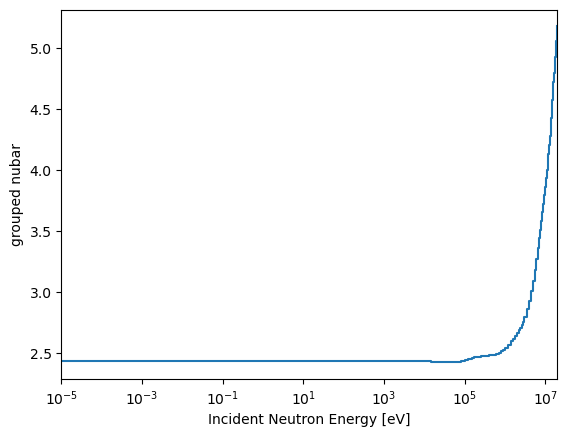

In [23]:
plt.step(nubar.incident_energy[:-1],nubar.mean_values,where='post')
plt.xscale("log")
plt.xlabel("Incident Neutron Energy [eV]")
plt.ylabel("grouped nubar")
plt.xlim(1e-5,2e7)

The uncertainty on nubar is on the Section object as both relative uncertainty and absolute uncertainty

In [24]:
# relative uncertainty
nubar.uncertainty

array([0.00714213, 0.00714213, 0.00675777, 0.00693916, 0.00655568,
       0.00655568, 0.00655568, 0.00655568, 0.00655568, 0.00655568,
       0.00655568, 0.00655568, 0.00655568, 0.00655568, 0.00655568,
       0.00655568, 0.00655568, 0.00655568, 0.00655568, 0.00655568,
       0.00655568, 0.00655568, 0.00655568, 0.00655568, 0.00612936,
       0.00612936, 0.00612936, 0.00612936, 0.00612936, 0.00560304,
       0.00560304, 0.00560304, 0.00560304, 0.00560304, 0.00548379,
       0.00548379, 0.00559419, 0.00573812, 0.00573812, 0.00678159,
       0.00678159, 0.00678159, 0.00678159, 0.00678159, 0.00595785,
       0.00595785, 0.00961457, 0.00961457, 0.00961457, 0.00961457,
       0.01304967, 0.01304967, 0.01304967, 0.01304967, 0.00731157,
       0.00731157, 0.00731157, 0.00731157, 0.00731157, 0.00731157,
       0.00731157, 0.00731157, 0.00702958, 0.00702958, 0.00702958,
       0.00702958, 0.00853581, 0.00853581, 0.00853581, 0.00853581,
       0.02203316, 0.02203316, 0.02203316, 0.02203316, 0.02203

In [25]:
# absolute uncertainty
nubar.abs_uncertainty

array([0.01740322, 0.01740322, 0.01646667, 0.01690004, 0.01595522,
       0.01595523, 0.01595523, 0.01595523, 0.01594476, 0.01592831,
       0.01591254, 0.01589555, 0.01588815, 0.01589173, 0.01590503,
       0.01592506, 0.01594736, 0.01597002, 0.01600517, 0.01604057,
       0.01606175, 0.01608136, 0.0161133 , 0.0161598 , 0.01514126,
       0.01515905, 0.01517338, 0.01518562, 0.01520715, 0.01393043,
       0.01397089, 0.01402598, 0.0140866 , 0.01415472, 0.01395531,
       0.01409095, 0.01451447, 0.01502716, 0.01516037, 0.01806935,
       0.01822066, 0.01837294, 0.01852876, 0.01869036, 0.01666905,
       0.01704016, 0.02816895, 0.02890093, 0.029694  , 0.03055168,
       0.04269211, 0.04387828, 0.04491048, 0.04581497, 0.02618431,
       0.02671457, 0.02723895, 0.02775474, 0.02825966, 0.02875693,
       0.02924934, 0.02974085, 0.02907167, 0.02956446, 0.03007335,
       0.03059036, 0.03777398, 0.03841108, 0.0390586 , 0.03970938,
       0.10414703, 0.10572608, 0.10722694, 0.10867487, 0.11008

the relative uncertainty is what is usually plotted

(1e-05, 20000000.0)

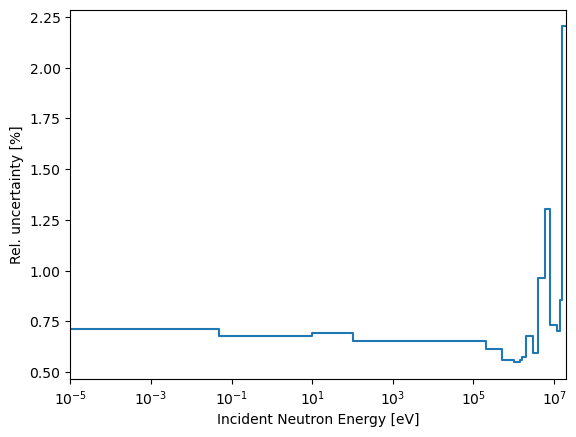

In [28]:
plt.step(nubar.group_boundaries[:-1],100*nubar.uncertainty,where='post')
plt.xscale("log")
plt.xlabel("Incident Neutron Energy [eV]")
plt.ylabel("Rel. uncertainty [%]")
plt.xlim(1e-5,2e7)

the relative covariance and correlation matrices are attributes, along with the absolute covariance matrix

Text(0.5, 1.0, 'Relative Covariance Matrix')

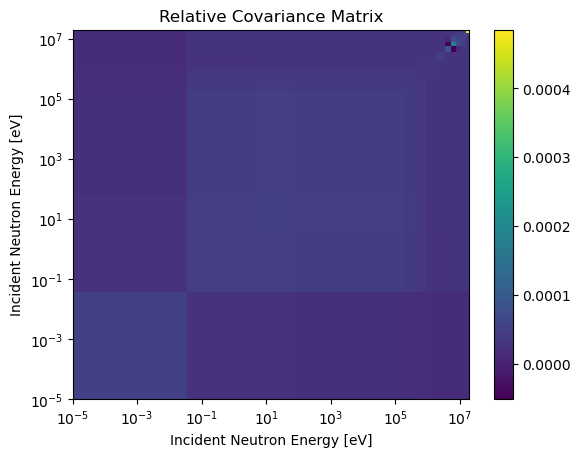

In [33]:
plt.pcolor(nubar.group_boundaries[:-1], nubar.group_boundaries[:-1], nubar.covariance_matrix)
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-5,2e7)
plt.ylim(1e-5,2e7)
plt.xlabel("Incident Neutron Energy [eV]")
plt.ylabel("Incident Neutron Energy [eV]")
plt.title("Relative Covariance Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

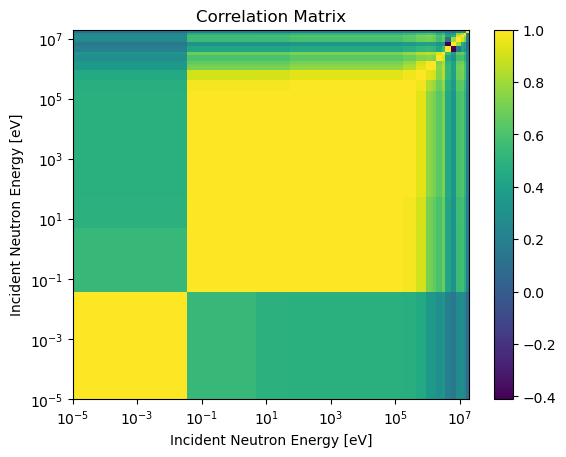

In [34]:
plt.pcolor(nubar.group_boundaries[:-1], nubar.group_boundaries[:-1], nubar.correlation_matrix)
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-5,2e7)
plt.ylim(1e-5,2e7)
plt.xlabel("Incident Neutron Energy [eV]")
plt.ylabel("Incident Neutron Energy [eV]")
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Absolute Covariance Matrix')

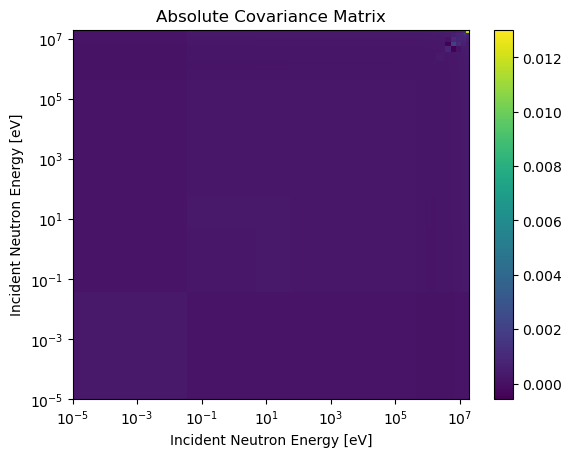

In [35]:
plt.pcolor(nubar.group_boundaries[:-1], nubar.group_boundaries[:-1], nubar.abs_covariance_matrix)
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-5,2e7)
plt.ylim(1e-5,2e7)
plt.xlabel("Incident Neutron Energy [eV]")
plt.ylabel("Incident Neutron Energy [eV]")
plt.title("Absolute Covariance Matrix")